In [1]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd


# Data Time Series for stock or financial statment analysis

<!-- PELICAN_BEGIN_SUMMARY -->
Time Series can be useful to analyze financial data in different frequencies based on data distribution.<br>We can reload/repeat the data analysis process in Python and export the result to Excel or CSV on daily, weekly, monthly, quarterly or yearly basis.

<!-- PELICAN_END_SUMMARY -->
**Goals: Generate Mock Data**

** Overview Data Time Series Basics**
    - Example is Amazon stock daily closing prices from 1997 - 2021 in CSV format
    - View date type: convert string to time sereies
    - Set date as index : retrieve range of data 
    - Resample function : for plotting
    - Assign date to the stock price without date column : with date frequency options
** Mock Data**
    - Generate date range 
    - Use Numpy to geneerate random number
    - Set index to match date and number     

In [2]:
## Read the file from CSV format
df = pd.read_csv('data/Amazon.csv')
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6145,10/15/2021,3311.419922,3410.419922,3304.000000,3409.020020,3409.020020,5175100
6146,10/18/2021,3388.360107,3449.169922,3385.100098,3446.739990,3446.739990,3174100
6147,10/19/2021,3434.290039,3454.689941,3422.000000,3444.149902,3444.149902,2386100
6148,10/20/2021,3452.659912,3462.860107,3400.370117,3415.060059,3415.060059,2139800
6149,10/21/2021,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400


<br>
**Find out Date type**<br>- The Date type here is a string, not time series type

In [3]:
type(df.Date[0])

str

<br>
**Convert string into time series type**<br>- By adding Parse to read the CSV file

In [4]:
df = pd.read_csv('data/Amazon.csv', parse_dates=["Date"])
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6145,2021-10-15,3311.419922,3410.419922,3304.000000,3409.020020,3409.020020,5175100
6146,2021-10-18,3388.360107,3449.169922,3385.100098,3446.739990,3446.739990,3174100
6147,2021-10-19,3434.290039,3454.689941,3422.000000,3444.149902,3444.149902,2386100
6148,2021-10-20,3452.659912,3462.860107,3400.370117,3415.060059,3415.060059,2139800
6149,2021-10-21,3414.250000,3440.280029,3403.000000,3435.010010,3435.010010,1881400


In [5]:
## Find out Date type again: the Date type is Timestamp which is one of the time series
type(df.Date[0])

pandas._libs.tslib.Timestamp

<br>
**Set index to Date by adding Index column (index_col) to Date**<br>-The benefit of setting index is we can retrieve specific date ranges of Amazon stock prices

In [6]:
df = pd.read_csv('data/Amazon.csv', parse_dates=["Date"],index_col="Date")
df.index

DatetimeIndex(['1997-05-16', '1997-05-19', '1997-05-20', '1997-05-21',
               '1997-05-22', '1997-05-23', '1997-05-27', '1997-05-28',
               '1997-05-29', '1997-05-30',
               ...
               '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21'],
              dtype='datetime64[ns]', name='Date', length=6150, freq=None)

In [7]:
## Retrieve September 2021 stock price
df["2021-09"].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-01,3496.399902,3527.000000,3475.239990,3479.000000,3479.000000,3629900
2021-09-02,3494.760010,3511.959961,3455.000000,3463.120117,3463.120117,2923700
2021-09-03,3452.000000,3482.669922,3436.439941,3478.050049,3478.050049,2575700
2021-09-07,3478.000000,3528.090088,3476.939941,3509.290039,3509.290039,2737900
2021-09-08,3511.649902,3545.629883,3495.669922,3525.500000,3525.500000,3053400


<br>
**Time Series enable us to do more financial analysis by few coding steps**
    - Get the average closing price of Amazon stock in March 2018
    - Retrieve the specific date price
    - Weekly, Monthly or Yearly average of the stock price
    - Plot the stock price

In [8]:
## Get the average closing price in March 2018
df["2021-09"].Close.mean()

3427.1828613333337

In [9]:
## Retrieving one specific day - can use loc slice function, but it's not necessary 
df.loc["2021-09-15":"2021-09-15"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-15,3442.52002,3485.419922,3402.01001,3475.790039,3475.790039,2957500


In [10]:
## Retrieving with a date range
df["2021-09-10":"2021-09-14"] 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-10,3501.830078,3508.449951,3462.909912,3469.149902,3469.149902,2393300
2021-09-13,3482.800049,3497.959961,3438.000000,3457.169922,3457.169922,2569000
2021-09-14,3475.550049,3486.810059,3437.709961,3450.000000,3450.000000,1936900


In [11]:
## Yearly average of the stock price
df.Close.resample('Y').mean().head()

Date
1997-12-31     3.133746
1998-12-31    15.661112
1999-12-31    69.062314
2000-12-31    46.533668
2001-12-31    12.200426
Freq: A-DEC, Name: Close, dtype: float64

<br>
**Resample data function**
    - Shift+tab to view all the possibilities of the Resample data function
    - Without Resample, the chart is more grannuily

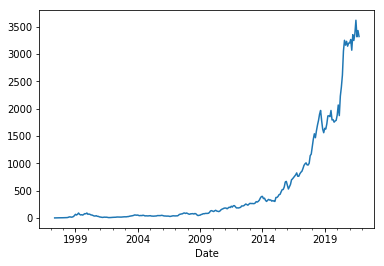

In [12]:
## Plot with resample - average monthly price 
df.Close.resample('M').mean().plot()

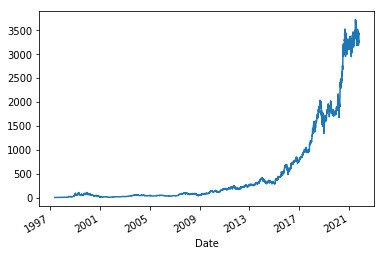

In [13]:
## Plot without Resample
df.Close.plot()

<br>
**Assigning date to a dataset with missing date**
    - The following example is the August 2021 Amazon stock prices but without any date
    - Read the stock closing price csv file with the missing date column
    - Assign the date to match the stock price

In [14]:
## Read August 2021 Amazon stock price csv file without date column
df1 = pd.read_csv('data\Amazon_No_Date.csv')
df1.tail()

,Open,High,Low,Close,Adj Close,Volume
17,3309.870117,3321.000000,3286.149902,3299.179932,3299.179932,1680300
18,3299.000000,3332.000000,3296.000000,3316.000000,3316.000000,2098800
19,3333.229980,3352.320068,3313.750000,3349.629883,3349.629883,2391300
20,3357.429932,3445.000000,3355.219971,3421.570068,3421.570068,3192200
21,3424.800049,3472.580078,3395.590088,3470.790039,3470.790039,4356400


<br>
**Assign the date to match the data**
    - Use "rng" function to assign date to matach stock price
    - Apply "B" (Business Day) as the frequency
    - Shift+ tab twice on "B" to follow the link for more day function
    - The Business day function does not consider holidays

In [15]:
rng = pd.date_range(start="8/1/2021", end = "8/31/2021", freq='B')
rng

DatetimeIndex(['2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-09', '2021-08-10', '2021-08-11',
               '2021-08-12', '2021-08-13', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25', '2021-08-26', '2021-08-27',
               '2021-08-30', '2021-08-31'],
              dtype='datetime64[ns]', freq='B')

<br>
**Set the date column as the index**<br> - You must specify "True" to modify the original dataframe

In [16]:
df1.set_index(rng,inplace=True)
df1.head(5)

,Open,High,Low,Close,Adj Close,Volume
2021-08-02,3353.100098,3358.919922,3317.000000,3331.479980,3331.479980,3353900
2021-08-03,3340.719971,3391.000000,3299.770020,3366.239990,3366.239990,4157300
2021-08-04,3379.350098,3388.879883,3345.560059,3354.719971,3354.719971,2183900
2021-08-05,3356.219971,3389.000000,3340.919922,3375.989990,3375.989990,2433500
2021-08-06,3375.000000,3375.000000,3329.040039,3344.939941,3344.939941,2635300


In [18]:
## Average Amazon price between 8/1/21 - 8/18/21
df1["2021-08-01":"2021-08-18"].Close.mean() 

3312.897686230769

<br>
**Add weekends to the list**<br> - The price would be the same as the previous business day's closing price

In [19]:
df1.asfreq('D', method='pad').head()

,Open,High,Low,Close,Adj Close,Volume
2021-08-02,3353.100098,3358.919922,3317.000000,3331.479980,3331.479980,3353900
2021-08-03,3340.719971,3391.000000,3299.770020,3366.239990,3366.239990,4157300
2021-08-04,3379.350098,3388.879883,3345.560059,3354.719971,3354.719971,2183900
2021-08-05,3356.219971,3389.000000,3340.919922,3375.989990,3375.989990,2433500
2021-08-06,3375.000000,3375.000000,3329.040039,3344.939941,3344.939941,2635300


<br>
**View stock data by weekly**<br> - 8/1/21 is Sunday, the weekly business date starts at 8/2/21

In [20]:
df1.asfreq('W', method='pad')

,Open,High,Low,Close,Adj Close,Volume
2021-08-08,3375.000000,3375.000000,3329.040039,3344.939941,3344.939941,2635300
2021-08-15,3305.669922,3306.070068,3283.000000,3293.969971,3293.969971,2052800
2021-08-22,3203.870117,3207.810059,3175.760010,3199.949951,3199.949951,3341200
2021-08-29,3333.229980,3352.320068,3313.750000,3349.629883,3349.629883,2391300


<br>
** Mock Data - Generating Dates and Random Data for Testing**
    - Set the date frequency to 'B' for business days
    - Import numpy to generate random numbers
    - Set the index to match the random numbers

<br>
**Generating business days**<br> - Generate 30 business days starting from 9/10/2021

In [21]:
rng = pd.date_range(start='9/10/2021', periods=30, freq='B')
rng

DatetimeIndex(['2021-09-10', '2021-09-13', '2021-09-14', '2021-09-15',
               '2021-09-16', '2021-09-17', '2021-09-20', '2021-09-21',
               '2021-09-22', '2021-09-23', '2021-09-24', '2021-09-27',
               '2021-09-28', '2021-09-29', '2021-09-30', '2021-10-01',
               '2021-10-04', '2021-10-05', '2021-10-06', '2021-10-07',
               '2021-10-08', '2021-10-11', '2021-10-12', '2021-10-13',
               '2021-10-14', '2021-10-15', '2021-10-18', '2021-10-19',
               '2021-10-20', '2021-10-21'],
              dtype='datetime64[ns]', freq='B')

<br>
**Import numpy to generate random numbers**<br> - Generate random numbers between 1 to 20 for the length of 30 days

In [22]:
import numpy as np
np.random.randint(1,20,len(rng))

array([13, 13, 19,  3,  6,  8, 14, 15, 12,  6,  1, 11,  4,  1, 18, 16, 12,
       16, 18,  8,  1, 14, 19, 10,  7, 16,  3,  9, 10,  7])